In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation, ensemble, preprocessing, decomposition, linear_model, metrics
%matplotlib inline

In [2]:
df = pd.read_csv('analysis.csv', delimiter=' ')

In [3]:
df = df.drop(['action_type', 'rate_spread'],1)

In [4]:
numerical_columns = ['loan_amount_ink',\
                    'applicant_income_ink',\
                    'minority_population_pct',\
                    'hud_median_family_income',\
                    'tract_to_msamd_income_pct',\
                    'number_of_owner_occupied_units']

In [5]:
categorical_columns = ['loan_type',\
                      'loan_purpose',\
                      'preapproval',\
                      'county_name',\
                      'applicant_ethnicity',\
                      'co_applicant_ethnicity',\
                      'applicant_race_1',\
                      'applicant_sex',
                      'hoepa_status',
                      'lien_status']

In [6]:
for col in categorical_columns:
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

for col in numerical_columns:
    df[col] = preprocessing.StandardScaler().fit_transform(np.array(df[col]).reshape(-1, 1))

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X,y = df.drop('target', axis=1), df.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.1)
# RandomForest
model1 = ensemble.RandomForestClassifier(max_depth=4)
model1.fit(X_train, y_train)
print model1.score(X_test, y_test)
# SGDClassifier
model2 = linear_model.SGDClassifier()
model2.fit(X_train, y_train)
print model2.score(X_test, y_test)

0.817967311234
0.811924493554


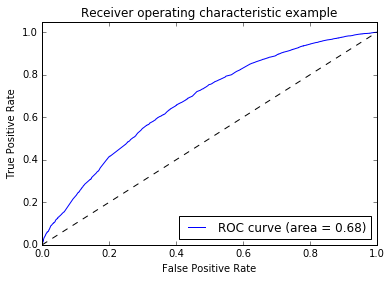

In [8]:
y_score = model1.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test, y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
X,y = df.drop([u'applicant_ethnicity', u'applicant_race_1', u'applicant_sex', 'target'], axis=1), df.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.1)
# RandomForest
model1 = ensemble.RandomForestClassifier(max_depth=4)
model1.fit(X_train, y_train)
print model1.score(X_test, y_test)
# SGDClassifier
model2 = linear_model.SGDClassifier()
model2.fit(X_train, y_train)
print model2.score(X_test, y_test)

0.81388121547
0.799666206262


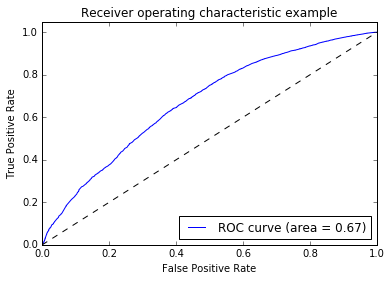

In [10]:
y_score = model1.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test, y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()